<a href="https://colab.research.google.com/github/dopedud/COMP3217-CW2/blob/main/source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP3217 COURSEWORK 2

# Import Modules

In [291]:
import numpy as np
import pandas as pd

## Read Files

In [292]:
binary_dataset_training = pd.read_csv('TrainingDataBinary.csv')
binary_X_testing = pd.read_csv('TestingDataBinary.csv')

multi_dataset_training = pd.read_csv('TrainingDataMulti.csv')
multi_X_testing = pd.read_csv('TestingDataMulti.csv')

binary_dataset_training.info()
multi_dataset_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 129 entries, R1-PA1:VH to marker
dtypes: float64(129)
memory usage: 5.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 129 entries, R1-PA1:VH to marker
dtypes: float64(129)
memory usage: 5.9 MB


In [293]:
binary_dataset_training.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.0,6000.00000,6000.00000,6000.00000,6000.00000,6000.0,6000.0,6000.0,6000.0,6000.000000
mean,-5.202654,131234.652733,-7.046442,131354.068362,-2.883982,131643.033619,-5.208205,395.619562,-8.830131,393.325834,...,0.0,0.00100,0.00100,0.00100,0.00100,0.0,0.0,0.0,0.0,0.500000
std,102.007816,5745.200620,103.614201,1523.247980,104.973394,1631.541917,101.946391,123.451995,103.598504,81.175502,...,0.0,0.03161,0.03161,0.03161,0.03161,0.0,0.0,0.0,0.0,0.500042
min,-179.822804,30238.363620,-179.020663,109269.310700,-179.868641,106034.858800,-179.828534,5.310190,-179.559243,6.042630,...,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.000000
25%,-102.850222,131158.275400,-102.474934,130857.396100,-100.273344,131208.421900,-101.115592,321.541160,-104.062027,325.203360,...,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.000000
50%,-9.293375,131634.667500,-2.480907,131358.861500,-7.015868,131684.814000,-7.955519,394.968270,-6.505936,399.546020,...,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.500000
75%,74.531782,132060.913100,90.395551,131860.326900,88.338633,132136.132900,73.577808,452.281700,87.636760,455.806567,...,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,1.000000
max,179.215469,138579.963300,179.960314,138304.157300,179.960314,138630.109800,179.662376,1760.236430,179.920207,1094.265360,...,0.0,1.00000,1.00000,1.00000,1.00000,0.0,0.0,0.0,0.0,1.000000


In [294]:
multi_dataset_training.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.0,6000.00000,6000.000000,6000.000000,6000.000000,6000.0,6000.0,6000.0,6000.0,6000.000000
mean,-19.882452,131378.347644,0.390396,131334.160186,2.848884,131662.268996,-20.667140,387.243103,-0.465448,387.995655,...,0.0,0.00100,0.001333,0.001167,0.001167,0.0,0.0,0.0,0.0,1.000000
std,100.297669,4818.458692,109.627647,2196.621540,99.307736,2292.258124,100.209885,113.079580,109.531209,83.530242,...,0.0,0.03161,0.036494,0.034139,0.034139,0.0,0.0,0.0,0.0,0.816565
min,-179.971773,30238.363620,-179.845722,34651.259140,-179.857182,29436.018980,-179.725401,0.000000,-179.994691,4.211530,...,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,-109.926250,131158.275400,-103.547798,130807.249600,-68.005793,131208.421900,-111.825605,317.695850,-103.675281,322.273600,...,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,-30.461301,131659.740800,1.930868,131383.934800,3.878925,131734.960600,-31.804887,384.439445,-0.429719,390.207410,...,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
75%,64.825877,132136.132900,101.287479,131910.473500,85.744566,132186.279400,62.780418,449.901270,99.551417,453.563470,...,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
max,179.943125,141638.902200,179.542055,140936.850700,179.960314,141714.122000,179.788427,1760.236430,179.988962,905.845170,...,0.0,1.00000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,2.000000


## Seperate Features and Labels

In [295]:
from sklearn.model_selection import train_test_split

binary_X_training = binary_dataset_training.iloc[:, :-1]
binary_Y_training = binary_dataset_training.iloc[:, -1]

multi_X_training = multi_dataset_training.iloc[:, :-1]
multi_Y_training = multi_dataset_training.iloc[:, -1]

binary_X_training, binary_X_validation, binary_Y_training, binary_Y_validation = train_test_split(
    binary_X_training, binary_Y_training, test_size = .1, random_state = 42
)

multi_X_training, multi_X_validation, multi_Y_training, multi_Y_validation = train_test_split(
    multi_X_training, multi_Y_training, test_size = .1, random_state = 42
)

## ML Training

In [296]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [297]:
# from sklearn.dummy import DummyClassifier

# clf_binary = DummyClassifier(strategy = 'uniform')
# clf_multi = DummyClassifier(strategy = 'uniform')

In [298]:
clf_binary = RandomForestClassifier()
clf_multi = RandomForestClassifier()

clf_binary.fit(binary_X_training, binary_Y_training)
binary_Y_testing = clf_binary.predict(binary_X_testing)

clf_multi.fit(multi_X_training, multi_Y_training)
multi_Y_testing = clf_multi.predict(multi_X_testing)

In [299]:
# parameter_grid_binary = {
#     EDIT PARAMETERS HERE
    
# }

# grid_search_binary = GridSearchCV(estimator = clf_binary, param_grid = parameter_grid_binary, cv = 10, n_jobs = 3, verbose = 2)

# parameter_grid_multi = {
#     EDIT PARAMETERS HERE

# }

# grid_search_multi = GridSearchCV(estimator = clf_multi, param_grid = parameter_grid_multi, cv = 10, n_jobs = 3, verbose = 2)

# grid_search_binary.fit(binary_X_training, binary_Y_training)
# tuned_binary_Y_testing = grid_search_binary.predict(binary_X_testing)

# grid_search_multi.fit(multi_X_training, multi_Y_training)
# tuned_multi_Y_testing = grid_search_multi.predict(multi_X_testing)

## Training Evaluation

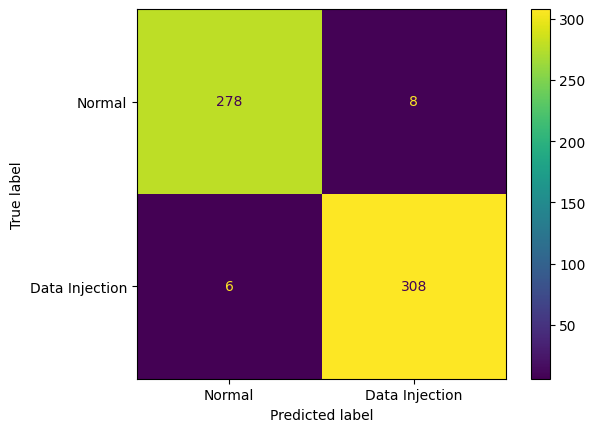


Accuracy score: 0.977
F1-score: 0.978

Precision score: 0.975
Recall score: 0.981

                precision    recall  f1-score   support

        Normal       0.98      0.97      0.98       286
Data Injection       0.97      0.98      0.98       314

      accuracy                           0.98       600
     macro avg       0.98      0.98      0.98       600
  weighted avg       0.98      0.98      0.98       600




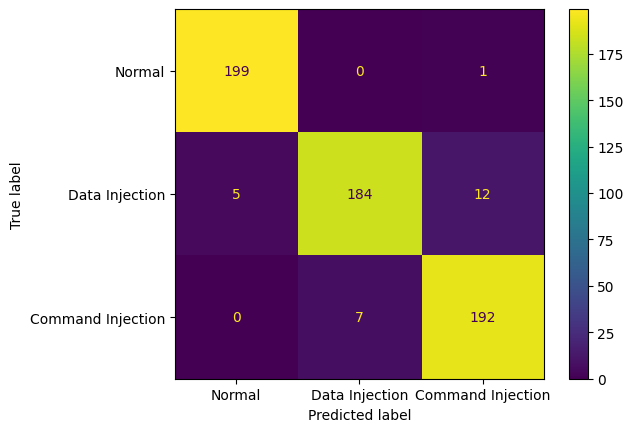


Accuracy score: 0.958
F1-score: 0.958

Precision score: 0.958
Recall score: 0.958

                   precision    recall  f1-score   support

           Normal       0.98      0.99      0.99       200
   Data Injection       0.96      0.92      0.94       201
Command Injection       0.94      0.96      0.95       199

         accuracy                           0.96       600
        macro avg       0.96      0.96      0.96       600
     weighted avg       0.96      0.96      0.96       600




In [300]:
import matplotlib.pyplot as plt

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)

def print_metrics(Y_test, predicted, labels):
    ConfusionMatrixDisplay(confusion_matrix(Y_test, predicted), display_labels = labels).plot()
    
    plt.show()
    
    print()

    print("Accuracy score: %.3f" % accuracy_score(Y_test, predicted))

    if (len(labels) > 2):
        print("F1-score: %.3f" % f1_score(Y_test, predicted, average = 'macro'))

        print()

        print("Precision score: %.3f" % precision_score(Y_test, predicted, average = 'macro'))
        print("Recall score: %.3f" % recall_score(Y_test, predicted, average = 'macro'))

    else:
        print("F1-score: %.3f" % f1_score(Y_test, predicted))

        print()

        print("Precision score: %.3f" % precision_score(Y_test, predicted))
        print("Recall score: %.3f" % recall_score(Y_test, predicted))

    print()

    print(classification_report(Y_test, predicted, target_names = labels))

    print()

print_metrics(binary_Y_validation, clf_binary.predict(binary_X_validation), ['Normal', 'Data Injection'])
print_metrics(multi_Y_validation, clf_multi.predict(multi_X_validation), ['Normal', 'Data Injection', 'Command Injection'])

In [301]:
binary_X_testing.join(pd.DataFrame(binary_Y_testing, columns = ['marker'])).to_csv('TestingResultsBinary.csv', index = False)
multi_X_testing.join(pd.DataFrame(multi_Y_testing, columns = ['marker'])).to_csv('TestingResultsMulti.csv', index = False)